#### Colab setup

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd "gdrive/My Drive/Colab Notebooks"

/content/gdrive/My Drive/Colab Notebooks


#### Imports

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

In [3]:
import common
import prune
from data import get_mnist, get_cifar
from experiment import Experiment
from models import LeNet_300_100, Conv2

In [4]:
#np.random.seed(common.SEED)
#torch.manual_seed(common.SEED)

In [5]:
def compare_pruning(experiment, criterion, layer, n_rounds, pruning_ratio, *, save_results=False):
    print("Random pruning experiment:\n")
    exp_acc, _ = prune.random_pruning_rounds(experiment, criterion, layer, n_rounds, 
                                             pruning_ratio, save_results=save_results)
    print("\nMaximizing weight norm:\n")
    e.init_model()
    mag_acc, _ = prune.prune_and_test(experiment, criterion, layer, prune.magnitude_pruning, 
                                         pruning_ratio, save_results=save_results)
    print("\nMaximizing frame potential:\n")
    e.init_model()
    max_fp_acc, _ = prune.prune_and_test(experiment, criterion, layer, prune.max_fp_pruning, 
                                         pruning_ratio, save_results=save_results)
    print("\nMinimizing frame potential:\n")
    e.init_model()
    min_fp_acc, _ = prune.prune_and_test(experiment, criterion, layer, prune.min_fp_pruning, 
                                         pruning_ratio, save_results=save_results)
    return exp_acc, mag_acc, max_fp_acc, min_fp_acc

In [6]:
def draw_plot(layer, exp_acc, mag_acc, max_fp_acc, min_fp_acc, *, figsize=(25,12), fig_name=""):
    plt.figure(figsize=figsize)
    plt.plot(max_fp_acc, label="Max-FP pruning")
    
    plt.plot(mag_acc, label="Magnitude pruning")
    
    exp_acc = np.array(exp_acc)
    random_accuracies = exp_acc.mean(axis=0)
    random_std_devs = exp_acc.std(axis=0)
    plt.errorbar(range(len(max_fp_acc)), random_accuracies, random_std_devs, linestyle='None', 
                 marker='.', label="Random pruning")
    
    plt.plot(min_fp_acc, label= "Min-FP pruning")
    
    plt.title("Accuracy after pruning " + layer)
    elem_type = "neurons" if layer[:2] == "fc" else "filters"
    plt.xlabel("Pruned " + elem_type)
    plt.ylabel("Accuracy (%)")
    plt.legend(loc="best")
    
    if fig_name:
        fig_path = os.path.join(common.FIGURE_PATH, fig_name)
        plt.savefig(fig_path)
    else:
        plt.show()

## MNIST / Lenet 300-100-10

In [20]:
train_batch_size = 16
test_batch_size = 1000

In [21]:
trainloader, testloader, classes = get_mnist(train_batch_size, test_batch_size)

In [22]:
epochs = 1
lr = 0.003
momentum = 0.9

In [25]:
model = LeNet_300_100()
e = Experiment(trainloader, testloader, model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
monitored = ['fc1', 'fc2', 'fc3']

In [0]:
test_accuracies, frame_potentials = e.fit(epochs, criterion, optimizer, monitored=monitored, save_results=True)


Test set: Average loss: 2.3126, Accuracy:    981/ 10000 (10%)

Train Epoch:   1 [     0/ 60000 (0%)]	Loss: 2.297517
Train Epoch:   1 [  6400/ 60000 (11%)]	Loss: 0.776636
Train Epoch:   1 [ 12800/ 60000 (21%)]	Loss: 0.371301
Train Epoch:   1 [ 19200/ 60000 (32%)]	Loss: 0.302402
Train Epoch:   1 [ 25600/ 60000 (43%)]	Loss: 0.183424
Train Epoch:   1 [ 32000/ 60000 (53%)]	Loss: 0.268265
Train Epoch:   1 [ 38400/ 60000 (64%)]	Loss: 0.229609
Train Epoch:   1 [ 44800/ 60000 (75%)]	Loss: 0.292853
Train Epoch:   1 [ 51200/ 60000 (85%)]	Loss: 0.223220
Train Epoch:   1 [ 57600/ 60000 (96%)]	Loss: 0.225943

Test set: Average loss: 0.2305, Accuracy:   9294/ 10000 (93%)

Train Epoch:   2 [     0/ 60000 (0%)]	Loss: 0.248529
Train Epoch:   2 [  6400/ 60000 (11%)]	Loss: 0.100980
Train Epoch:   2 [ 12800/ 60000 (21%)]	Loss: 0.518315
Train Epoch:   2 [ 19200/ 60000 (32%)]	Loss: 0.162574
Train Epoch:   2 [ 25600/ 60000 (43%)]	Loss: 0.204296
Train Epoch:   2 [ 32000/ 60000 (53%)]	Loss: 0.182096
Train Epoc

Train Epoch:  14 [ 38400/ 60000 (64%)]	Loss: 0.011307
Train Epoch:  14 [ 44800/ 60000 (75%)]	Loss: 0.014324
Train Epoch:  14 [ 51200/ 60000 (85%)]	Loss: 0.002269
Train Epoch:  14 [ 57600/ 60000 (96%)]	Loss: 0.009235

Test set: Average loss: 0.0676, Accuracy:   9796/ 10000 (98%)

Train Epoch:  15 [     0/ 60000 (0%)]	Loss: 0.012217
Train Epoch:  15 [  6400/ 60000 (11%)]	Loss: 0.009298
Train Epoch:  15 [ 12800/ 60000 (21%)]	Loss: 0.003351
Train Epoch:  15 [ 19200/ 60000 (32%)]	Loss: 0.016323
Train Epoch:  15 [ 25600/ 60000 (43%)]	Loss: 0.012470
Train Epoch:  15 [ 32000/ 60000 (53%)]	Loss: 0.008508
Train Epoch:  15 [ 38400/ 60000 (64%)]	Loss: 0.002910
Train Epoch:  15 [ 44800/ 60000 (75%)]	Loss: 0.004058
Train Epoch:  15 [ 51200/ 60000 (85%)]	Loss: 0.026527
Train Epoch:  15 [ 57600/ 60000 (96%)]	Loss: 0.009602

Test set: Average loss: 0.0665, Accuracy:   9796/ 10000 (98%)

Train Epoch:  16 [     0/ 60000 (0%)]	Loss: 0.006045
Train Epoch:  16 [  6400/ 60000 (11%)]	Loss: 0.014475
Train Epoc

Train Epoch:  28 [ 12800/ 60000 (21%)]	Loss: 0.001710
Train Epoch:  28 [ 19200/ 60000 (32%)]	Loss: 0.005970
Train Epoch:  28 [ 25600/ 60000 (43%)]	Loss: 0.001615
Train Epoch:  28 [ 32000/ 60000 (53%)]	Loss: 0.004596
Train Epoch:  28 [ 38400/ 60000 (64%)]	Loss: 0.001083
Train Epoch:  28 [ 44800/ 60000 (75%)]	Loss: 0.003696
Train Epoch:  28 [ 51200/ 60000 (85%)]	Loss: 0.000999
Train Epoch:  28 [ 57600/ 60000 (96%)]	Loss: 0.001077

Test set: Average loss: 0.0674, Accuracy:   9814/ 10000 (98%)

Train Epoch:  29 [     0/ 60000 (0%)]	Loss: 0.001880
Train Epoch:  29 [  6400/ 60000 (11%)]	Loss: 0.001712
Train Epoch:  29 [ 12800/ 60000 (21%)]	Loss: 0.003225
Train Epoch:  29 [ 19200/ 60000 (32%)]	Loss: 0.001009
Train Epoch:  29 [ 25600/ 60000 (43%)]	Loss: 0.001965
Train Epoch:  29 [ 32000/ 60000 (53%)]	Loss: 0.001297
Train Epoch:  29 [ 38400/ 60000 (64%)]	Loss: 0.001730
Train Epoch:  29 [ 44800/ 60000 (75%)]	Loss: 0.003127
Train Epoch:  29 [ 51200/ 60000 (85%)]	Loss: 0.005316
Train Epoch:  29 [ 

Train Epoch:  41 [ 57600/ 60000 (96%)]	Loss: 0.000620

Test set: Average loss: 0.0723, Accuracy:   9822/ 10000 (98%)

Train Epoch:  42 [     0/ 60000 (0%)]	Loss: 0.000934
Train Epoch:  42 [  6400/ 60000 (11%)]	Loss: 0.000729
Train Epoch:  42 [ 12800/ 60000 (21%)]	Loss: 0.000921
Train Epoch:  42 [ 19200/ 60000 (32%)]	Loss: 0.000907
Train Epoch:  42 [ 25600/ 60000 (43%)]	Loss: 0.001151
Train Epoch:  42 [ 32000/ 60000 (53%)]	Loss: 0.000622
Train Epoch:  42 [ 38400/ 60000 (64%)]	Loss: 0.001053
Train Epoch:  42 [ 44800/ 60000 (75%)]	Loss: 0.000861
Train Epoch:  42 [ 51200/ 60000 (85%)]	Loss: 0.000481
Train Epoch:  42 [ 57600/ 60000 (96%)]	Loss: 0.000687

Test set: Average loss: 0.0730, Accuracy:   9821/ 10000 (98%)

Train Epoch:  43 [     0/ 60000 (0%)]	Loss: 0.001083
Train Epoch:  43 [  6400/ 60000 (11%)]	Loss: 0.000644
Train Epoch:  43 [ 12800/ 60000 (21%)]	Loss: 0.000180
Train Epoch:  43 [ 19200/ 60000 (32%)]	Loss: 0.001373
Train Epoch:  43 [ 25600/ 60000 (43%)]	Loss: 0.001025
Train Epoc

In [26]:
layer = 'fc1'
pruning = prune.max_fp_pruning
pruning_ratio = 0.5
pruning_time = 500
stop_time = 50

In [27]:
p_test_accuracies, p_frame_potentials = prune.fit_and_prune(e, epochs, criterion, optimizer, layer, pruning, 
                                                        pruning_ratio, pruning_time, stop_time, log_interval=10)

Train Epoch:   0 [     0/ 60000 (0%)]	Loss: 2.317997

Test set: Average loss: 2.3016, Accuracy:   1186/ 10000 (12%)

Train Epoch:   1 [   160/ 60000 (0%)]	Loss: 2.294618

Test set: Average loss: 2.2628, Accuracy:   2337/ 10000 (23%)

Train Epoch:   2 [   320/ 60000 (1%)]	Loss: 2.148117

Test set: Average loss: 2.1821, Accuracy:   3773/ 10000 (38%)

Train Epoch:   3 [   480/ 60000 (1%)]	Loss: 2.125413

Test set: Average loss: 2.0761, Accuracy:   5342/ 10000 (53%)

Train Epoch:   4 [   640/ 60000 (1%)]	Loss: 1.931295

Test set: Average loss: 1.9470, Accuracy:   5860/ 10000 (59%)

Train Epoch:   5 [   800/ 60000 (1%)]	Loss: 1.649142

Test set: Average loss: 1.7847, Accuracy:   5799/ 10000 (58%)

Train Epoch:   6 [   960/ 60000 (2%)]	Loss: 1.458841

Test set: Average loss: 1.5928, Accuracy:   6521/ 10000 (65%)

Train Epoch:   7 [  1120/ 60000 (2%)]	Loss: 1.264616

Test set: Average loss: 1.3869, Accuracy:   6703/ 10000 (67%)

Train Epoch:   8 [  1280/ 60000 (2%)]	Loss: 1.398737

Test set: 

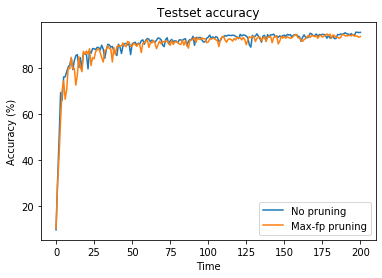

In [19]:
plt.plot(test_accuracies, label="No pruning")
plt.plot(p_test_accuracies, label="Max-fp pruning")
plt.title('Testset accuracy')
plt.xlabel('Time')
plt.ylabel('Accuracy (%)')
plt.legend(loc="best")
plt.show()

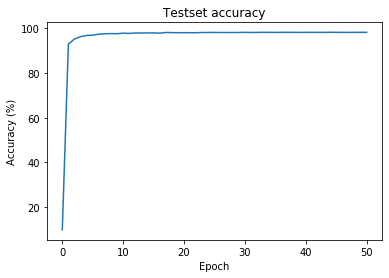

In [0]:
plt.plot(test_accuracies)
plt.title('Testset accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()

[Text(0, 0.5, 'FP'), Text(0.5, 0, 'epoch')]

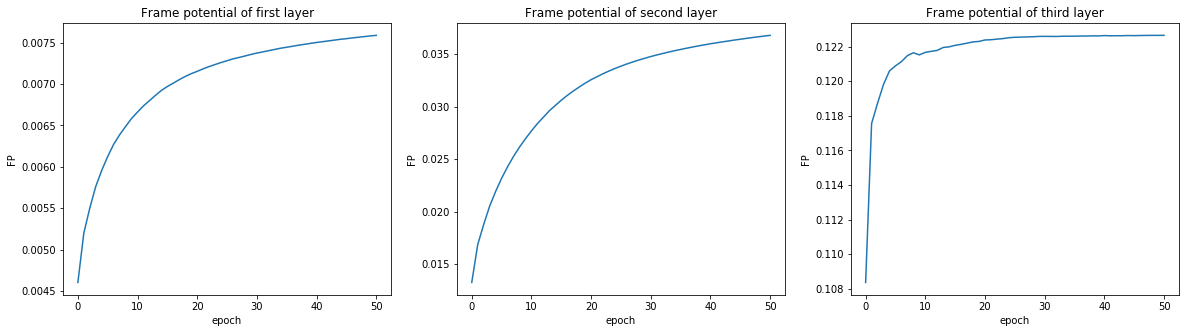

In [0]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex=True, figsize=(20,5))
ax1.plot(frame_potentials['fc1'])
ax1.set_title('Frame potential of first layer')
ax1.set(xlabel='epoch', ylabel='FP')
ax2.plot(frame_potentials['fc2'])
ax2.set_title('Frame potential of second layer')
ax2.set(xlabel='epoch', ylabel='FP')
ax3.plot(frame_potentials['fc3'])
ax3.set_title('Frame potential of third layer')
ax3.set(xlabel='epoch', ylabel='FP')

In [0]:
model_name = "LeNet_300_100_01-10-2019_10:13:45"
criterion = nn.CrossEntropyLoss()
layer = "fc1"
n_rounds = 3
pruning_ratio = 0.2

In [0]:
e = Experiment(trainloader, testloader, LeNet_300_100(), model_name=model_name)
exp_acc, mag_acc, max_fp_acc, min_fp_acc = compare_pruning(e, criterion, layer, n_rounds, pruning_ratio, save_results=False)

Random pruning experiment:

Random pruning experiment N° 1

Test set: Average loss: 0.0747, Accuracy:   9821/ 10000 (98%)


Test set: Average loss: 0.0744, Accuracy:   9823/ 10000 (98%)


Test set: Average loss: 0.0748, Accuracy:   9825/ 10000 (98%)


Test set: Average loss: 0.0746, Accuracy:   9825/ 10000 (98%)


Test set: Average loss: 0.0752, Accuracy:   9824/ 10000 (98%)


Test set: Average loss: 0.0752, Accuracy:   9822/ 10000 (98%)


Test set: Average loss: 0.0752, Accuracy:   9821/ 10000 (98%)


Test set: Average loss: 0.0752, Accuracy:   9825/ 10000 (98%)


Test set: Average loss: 0.0752, Accuracy:   9817/ 10000 (98%)


Test set: Average loss: 0.0842, Accuracy:   9797/ 10000 (98%)


Test set: Average loss: 0.0920, Accuracy:   9775/ 10000 (98%)

Pruning round: [ 10/ 60 (17%)]

Test set: Average loss: 0.0923, Accuracy:   9776/ 10000 (98%)


Test set: Average loss: 0.0933, Accuracy:   9777/ 10000 (98%)


Test set: Average loss: 0.0921, Accuracy:   9778/ 10000 (98%)


Test set: Ave


Test set: Average loss: 0.0747, Accuracy:   9821/ 10000 (98%)


Test set: Average loss: 0.0747, Accuracy:   9818/ 10000 (98%)


Test set: Average loss: 0.0755, Accuracy:   9815/ 10000 (98%)


Test set: Average loss: 0.0757, Accuracy:   9817/ 10000 (98%)


Test set: Average loss: 0.0765, Accuracy:   9810/ 10000 (98%)


Test set: Average loss: 0.0773, Accuracy:   9806/ 10000 (98%)


Test set: Average loss: 0.0775, Accuracy:   9804/ 10000 (98%)


Test set: Average loss: 0.0778, Accuracy:   9811/ 10000 (98%)


Test set: Average loss: 0.0776, Accuracy:   9808/ 10000 (98%)


Test set: Average loss: 0.0785, Accuracy:   9808/ 10000 (98%)


Test set: Average loss: 0.0806, Accuracy:   9804/ 10000 (98%)

Pruning round: [ 10/ 60 (17%)]

Test set: Average loss: 0.0818, Accuracy:   9807/ 10000 (98%)


Test set: Average loss: 0.0820, Accuracy:   9807/ 10000 (98%)


Test set: Average loss: 0.0822, Accuracy:   9807/ 10000 (98%)


Test set: Average loss: 0.0819, Accuracy:   9806/ 10000 (98%)


Test set


Test set: Average loss: 0.0747, Accuracy:   9821/ 10000 (98%)


Test set: Average loss: 0.0747, Accuracy:   9821/ 10000 (98%)


Test set: Average loss: 0.0747, Accuracy:   9821/ 10000 (98%)


Test set: Average loss: 0.0747, Accuracy:   9822/ 10000 (98%)


Test set: Average loss: 0.0747, Accuracy:   9821/ 10000 (98%)


Test set: Average loss: 0.0746, Accuracy:   9822/ 10000 (98%)


Test set: Average loss: 0.0747, Accuracy:   9823/ 10000 (98%)


Test set: Average loss: 0.0747, Accuracy:   9823/ 10000 (98%)


Test set: Average loss: 0.0748, Accuracy:   9822/ 10000 (98%)


Test set: Average loss: 0.0748, Accuracy:   9822/ 10000 (98%)


Test set: Average loss: 0.0749, Accuracy:   9823/ 10000 (98%)

Pruning round: [ 10/ 60 (17%)]

Test set: Average loss: 0.0748, Accuracy:   9819/ 10000 (98%)


Test set: Average loss: 0.0746, Accuracy:   9819/ 10000 (98%)


Test set: Average loss: 0.0745, Accuracy:   9819/ 10000 (98%)


Test set: Average loss: 0.0744, Accuracy:   9819/ 10000 (98%)


Test set

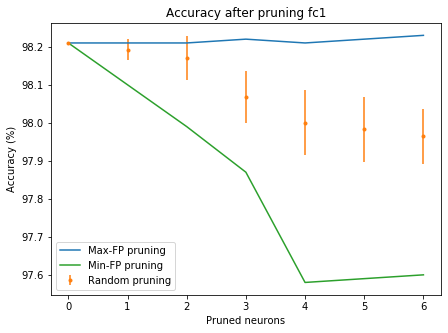

In [0]:
draw_plot(layer, exp_acc, max_fp_acc, min_fp_acc, figsize=(7,5), fig_name="")

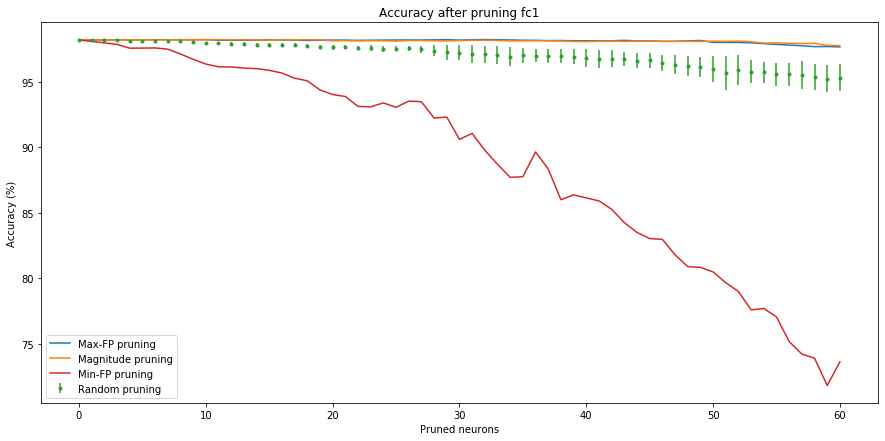

In [0]:
draw_plot(layer, exp_acc, mag_acc, max_fp_acc, min_fp_acc, figsize=(15,7), fig_name="")

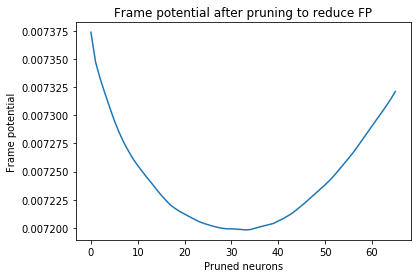

In [0]:
plt.plot(frame_potentials['fc1'])
plt.title('Frame potential after pruning to reduce FP')
plt.xlabel('Pruned neurons')
plt.ylabel('Frame potential')
plt.show()

#### Show images, compare class results

In [0]:
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%9s' % classes[labels[j]] for j in range(4)))

In [0]:
print(images.shape)
print(labels.shape)

torch.Size([4, 1, 28, 28])
torch.Size([4])


In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: \n', ' '.join('%9s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: \n', ' '.join('%9s' % classes[predicted[j]]
                              for j in range(4)))

Predicted: 
         7         2         1         0


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of 0 : 98 %
Accuracy of 1 : 97 %
Accuracy of 2 : 89 %
Accuracy of 3 : 96 %
Accuracy of 4 : 100 %
Accuracy of 5 : 92 %
Accuracy of 6 : 94 %
Accuracy of 7 : 96 %
Accuracy of 8 : 98 %
Accuracy of 9 : 97 %


## CIFAR-10 / Conv-2

In [0]:
train_batch_size = 64
test_batch_size = 1000

In [10]:
trainloader, testloader, classes = get_cifar(train_batch_size, test_batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
epochs = 20
lr = 0.0002

In [0]:
model = Conv2()
e = Experiment(trainloader, testloader, model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
monitored = ['conv1', 'conv2', 'fc1', 'fc2']

In [0]:
test_accuracies, frame_potentials = e.fit(epochs, criterion, optimizer, monitored=monitored, save_results=False)


Test set: Average loss: 2.3042, Accuracy:    990/ 10000 (10%)

Train Epoch:   1 [     0/ 50000 (0%)]	Loss: 2.309030
Train Epoch:   1 [  6400/ 50000 (13%)]	Loss: 1.742888
Train Epoch:   1 [ 12800/ 50000 (26%)]	Loss: 1.389441
Train Epoch:   1 [ 19200/ 50000 (38%)]	Loss: 1.221832
Train Epoch:   1 [ 25600/ 50000 (51%)]	Loss: 1.265922
Train Epoch:   1 [ 32000/ 50000 (64%)]	Loss: 1.124998
Train Epoch:   1 [ 38400/ 50000 (77%)]	Loss: 1.327337
Train Epoch:   1 [ 44800/ 50000 (90%)]	Loss: 1.221110

Test set: Average loss: 1.1754, Accuracy:   5812/ 10000 (58%)

Train Epoch:   2 [     0/ 50000 (0%)]	Loss: 1.117527
Train Epoch:   2 [  6400/ 50000 (13%)]	Loss: 0.990872
Train Epoch:   2 [ 12800/ 50000 (26%)]	Loss: 1.152403
Train Epoch:   2 [ 19200/ 50000 (38%)]	Loss: 0.908521
Train Epoch:   2 [ 25600/ 50000 (51%)]	Loss: 1.022519
Train Epoch:   2 [ 32000/ 50000 (64%)]	Loss: 0.883264
Train Epoch:   2 [ 38400/ 50000 (77%)]	Loss: 0.807983
Train Epoch:   2 [ 44800/ 50000 (90%)]	Loss: 0.735661

Test set:

[Text(0, 0.5, 'FP'), Text(0.5, 0, 'epoch')]

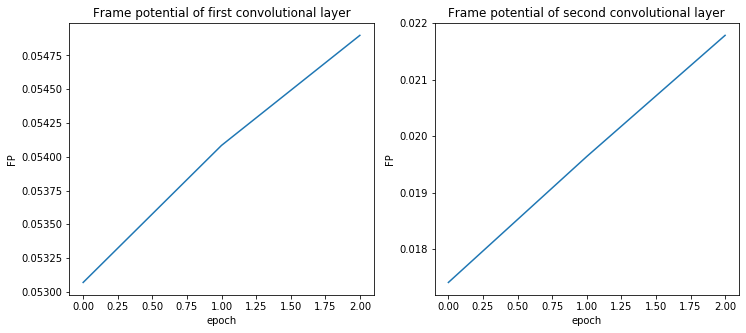

In [0]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, sharex=True, figsize=(12,5))
ax1.plot(frame_potentials['conv1'])
ax1.set_title('Frame potential of first convolutional layer')
ax1.set(xlabel='epoch', ylabel='FP')
ax2.plot(frame_potentials['conv2'])
ax2.set_title('Frame potential of second convolutional layer')
ax2.set(xlabel='epoch', ylabel='FP')

### Pruning Conv2

In [0]:
model_name = "Conv2_01-10-2019_12:37:35"
criterion = nn.CrossEntropyLoss()
n_rounds = 3
pruning_ratio = 0.6

#### Pruning the first fully connected layer

In [12]:
layer = "fc1"
e = Experiment(trainloader, testloader, Conv2(), model_name=model_name)
exp_acc, mag_acc, max_fp_acc, min_fp_acc = compare_pruning(e, criterion, layer, n_rounds, pruning_ratio, save_results=False)

Random pruning experiment:

Random pruning experiment N° 1

Test set: Average loss: 2.2412, Accuracy:   6966/ 10000 (70%)


Test set: Average loss: 2.2446, Accuracy:   6963/ 10000 (70%)


Test set: Average loss: 2.2488, Accuracy:   6966/ 10000 (70%)


Test set: Average loss: 2.2488, Accuracy:   6966/ 10000 (70%)


Test set: Average loss: 2.2488, Accuracy:   6966/ 10000 (70%)


Test set: Average loss: 2.2488, Accuracy:   6966/ 10000 (70%)


Test set: Average loss: 2.2488, Accuracy:   6966/ 10000 (70%)


Test set: Average loss: 2.2569, Accuracy:   6946/ 10000 (69%)


Test set: Average loss: 2.2531, Accuracy:   6933/ 10000 (69%)


Test set: Average loss: 2.2785, Accuracy:   6899/ 10000 (69%)


Test set: Average loss: 2.2785, Accuracy:   6899/ 10000 (69%)

Pruning round: [ 10/153 (7%)]

Test set: Average loss: 2.2762, Accuracy:   6876/ 10000 (69%)


Test set: Average loss: 2.2762, Accuracy:   6876/ 10000 (69%)


Test set: Average loss: 2.2938, Accuracy:   6832/ 10000 (68%)


Test set: Aver

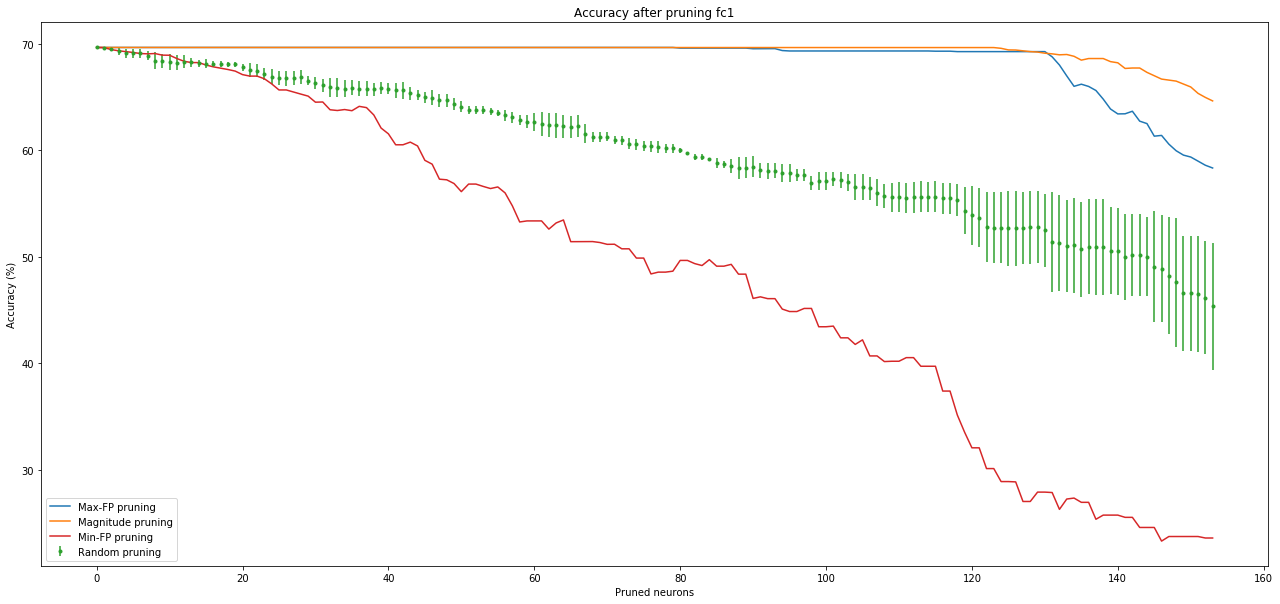

In [14]:
draw_plot(layer, exp_acc, mag_acc, max_fp_acc, min_fp_acc, figsize=(22,10), fig_name="prune_Conv2_fc1_acc")

#### Pruning the first convolutional layer

In [0]:
layer = "conv1"
e = Experiment(trainloader, testloader, Conv2(), model_name=model_name)
exp_acc, mag_acc, max_fp_acc, min_fp_acc = compare_pruning(e, criterion, layer, n_rounds, pruning_ratio, save_results=False)

In [0]:
draw_plot(layer, exp_acc, mag_acc, max_fp_acc, min_fp_acc, figsize=(10,5), fig_name="")

### Show images, compare class results

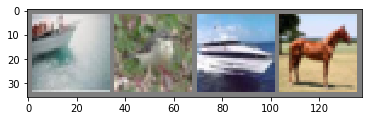

 ship  bird  ship horse


In [0]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 69 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 52 %
Accuracy of   car : 65 %
Accuracy of  bird : 51 %
Accuracy of   cat : 46 %
Accuracy of  deer : 53 %
Accuracy of   dog : 20 %
Accuracy of  frog : 49 %
Accuracy of horse : 59 %
Accuracy of  ship : 79 %
Accuracy of truck : 57 %
